carregando dados1
carregando dados2
carregando dados3
carregando dados4
carregando dados5
carregando dados6
carregando dados7
carregando dados8
carregando dados9
carregando dados10


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


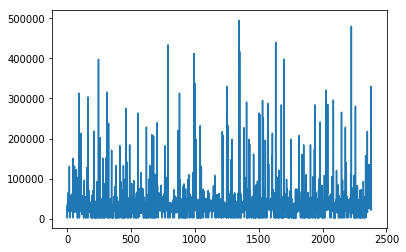

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#lendo os dados do dataset
data=pd.read_csv('data.csv')


#checando rapidamente o formato dos dados lidos
data.shape

#convertendo os dados categorigos em dados nao categoricos
data_dummies = pd.get_dummies(data)

non_categorical_columns =['Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity', 'MSRP']

x1=data_dummies
x2=data[non_categorical_columns]
data_temp = pd.concat([x2,x1], axis=1)
#checando rapidamente os dados convertidos em uma variavel temporaria
data_temp.head()

#criando uma tabela apenas com dados nao categoricos 
features_columns = non_categorical_columns[0:6]+list(data_dummies.columns)

#removendo dados em branco
data_temp = data_temp.fillna(0)
features = data_temp[features_columns]
target = data_temp['MSRP']

#dividindo o dataset em dados de treino e dados de teste na proporcao de 0,8 para treino e 0,2 para testes
xtreino, xteste,ytreino,yteste = train_test_split(features, target, test_size=0.2)

#removendo colunas duplicadas
yteste = yteste.loc[:,~yteste.columns.duplicated()]
ytreino = ytreino.loc[:,~ytreino.columns.duplicated()]

#criando um array para armezanar a acuracia com os melhores K para os vizinhos
acuracia = np.empty((0))

#variando o k, testando a melhor acuracia atraves do tecnica 'mean_squared_error' e armazenando as acuracias obtidas

for k in range(1,11):    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtreino,ytreino.values.ravel())
    cross_points = cross_val_score(knn,features, target, cv=10, scoring='neg_mean_squared_error').mean()
    acuracia = np.append(acuracia, cross_points)
    print("carregando dados"+str(k))

#recuperando o indice da melhor acuracia
bestK= np.argmax(acuracia)+1

#instanciando o modelo com o k de melhor acuracia
knn = KNeighborsClassifier(n_neighbors=bestK)
#treinando o modelo
knn.fit(xtreino,ytreino)

#realizando a previsão
response_predict = knn.predict(xteste)
#checando os dados preditos
response_predict = pd.DataFrame(response_predict)
response_predict = response_predict.loc[:,~response_predict.columns.duplicated()]
#analisando dados obtidos pela previsão
plt.plot(list(range(len(list(response_predict[0].values)))), list(response_predict[0].values))


In [7]:
#checando os arrays com erros quadradicos obtidos.
#Pelo metodo de cross points de validacao cruzada quanto maior o valor melhor a predicao
acuracia

array([-3.40536690e+07, -5.42006839e+07, -5.49261403e+07, -3.31812617e+08,
       -3.87277594e+08, -4.48973995e+08, -5.77537122e+08, -5.77825961e+08,
       -5.78000762e+08, -6.09999002e+08])

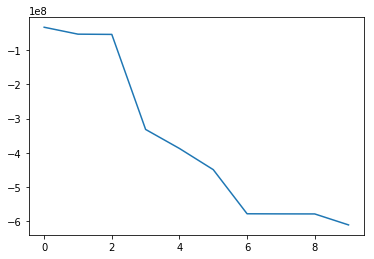

In [9]:
xAxis = list(range(len(acuracia)))
yAxis = acuracia
#checando pontos de acuracia graficamente
plt.plot(xAxis,yAxis)

In [23]:
#checando apenas o indice do menor erro obtido
bestK


1

In [24]:
#checando o valor do menor erro obtido
acuracia[bestK-1]

-34053669.030481756

In [25]:
#checando a porcentagem de acertos do modelo para o k=1
print(metrics.accuracy_score(yteste,response_predict))

0.3285774234158624


NameError: name 'pd' is not defined

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.2622744439781788
